In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

## Генерируем данные для задачи классификации

In [2]:
data = make_classification(n_samples=1000,
                           n_classes=2,
                           n_features=2,
                           n_redundant=0,
                           class_sep=0.9,
                           random_state=15347)

## Визуализируем сгенерированные данные

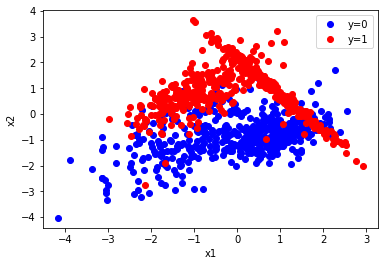

In [3]:
plt.plot(data[0][data[1]==0, 0], data[0][data[1]==0, 1], 'ob',
         data[0][data[1]==1, 0], data[0][data[1]==1, 1], 'or')

plt.legend(['y=0', 'y=1'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Разделяем выборку на обучающее и тестовое множества

In [4]:
# используем 75% данных для обучения
X_train, X_test, y_train, y_test = train_test_split(*data, 
                                                    test_size=0.25,
                                                    random_state=15342)

## Функции оценки качества и визуализации

In [5]:
def report(y_true, y_pred):
    acc = accuracy_score(y_test, y_pred)
    print('accuracy: %.3f' % acc)
    print(classification_report(y_test, y_pred))
    return acc

In [6]:
def decision_boundary(X, y, clf, title):
    x1_min, x1_max = min(X[:, 0]) - 1, max(X[:, 0]) + 1
    x2_min, x2_max = min(X[:, 1]) - 1, max(X[:, 1]) + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), 
                           np.arange(x2_min, x2_max, 0.01))

    zz = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])

    plt.contourf(xx1, xx2,
                 zz.reshape(xx1.shape),
                 cmap=plt.cm.magma, alpha=0.7)

    plt.plot(X[y==0, 0], X[y==0, 1], 'ob',
             X[y==1, 0], X[y==1, 1], 'or')
    
    plt.legend(['y=0', 'y=1'])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.show()

## Строим модель логистической регрессии

In [7]:
model_logreg = LogisticRegression().fit(X_train, y_train)

### Оцениваем качество на тестовом множестве

In [8]:
accuracy_logreg = report(y_test, model_logreg.predict(X_test))

accuracy: 0.884
             precision    recall  f1-score   support

          0       0.88      0.89      0.89       127
          1       0.89      0.88      0.88       123

avg / total       0.88      0.88      0.88       250



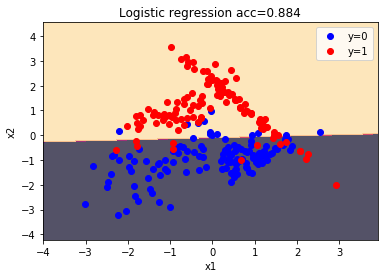

In [9]:
decision_boundary(X_test, y_test, model_logreg, 
                  'Logistic regression acc=%.3f' % accuracy_logreg)

## Строим модель линейной SVM

In [10]:
model_linear_svm = SVC(kernel='linear').fit(X_train, y_train)

### Оцениваем качество на тестовом множестве

In [11]:
accuracy_linear_svm = report(y_test, model_linear_svm.predict(X_test))

accuracy: 0.888
             precision    recall  f1-score   support

          0       0.88      0.91      0.89       127
          1       0.90      0.87      0.88       123

avg / total       0.89      0.89      0.89       250



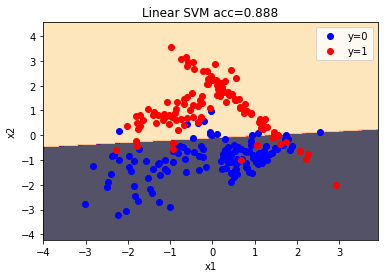

In [12]:
decision_boundary(X_test, y_test, model_linear_svm, 
                  'Linear SVM acc=%.3f' % accuracy_linear_svm)

## Строим модель SVM с радиальными базисными функциями (RBF)

In [13]:
model_rbf_svm = SVC(kernel='rbf').fit(X_train, y_train)

### Оцениваем качество на тестовом множестве

In [14]:
accuracy_rbf_svm = report(y_test, model_rbf_svm.predict(X_test))

accuracy: 0.932
             precision    recall  f1-score   support

          0       0.97      0.90      0.93       127
          1       0.90      0.97      0.93       123

avg / total       0.93      0.93      0.93       250



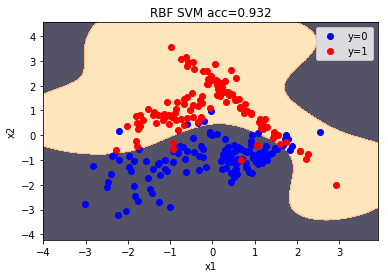

In [15]:
decision_boundary(X_test, y_test, model_rbf_svm, 
                  'RBF SVM acc=%.3f' % accuracy_rbf_svm)

## Результаты на тестовом множестве

| Алгоритм | Accuracy
| :- | --: 
| Logistic Regression | 0.884
| Linear SVM | 0.888
| RBF SVM | 0.932